In [1]:
from ultralytics import YOLO

In [19]:
model = YOLO("./runs/detect/train/weights/last.pt")


In [29]:
results = model.predict("./img/Voltage.jpg") # accept un path ou un tab de path
result = results[0] # une img donc le resultat est un tableau de longeur 1



image 1/1 c:\Users\Utilisateur\Documents\IA\img\Voltage.jpg: 512x640 2 climbing-shoess, 922.3ms
Speed: 3.5ms preprocess, 922.3ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 640)


In [4]:
print(result.names)

{0: 'climbing-shoes'}


In [30]:
filtered_boxes = [box for box in result.boxes if box.conf[0].item() >= 0.5]
result.boxes = filtered_boxes

for box in filtered_boxes:
    class_id = result.names[box.cls[0].item()]
    coordinates = box.xyxy[0].tolist()
    coordinates = [round(x) for x in coordinates]
    confidence = round(box.conf[0].item(), 2)
    
    print("Object type:", class_id)
    print("Coordinates:", coordinates)
    print("Probability:", confidence)
    print("---")

Object type: climbing-shoes
Coordinates: [396, 97, 1077, 752]
Probability: 0.98
---
Object type: climbing-shoes
Coordinates: [51, 23, 358, 826]
Probability: 0.93
---


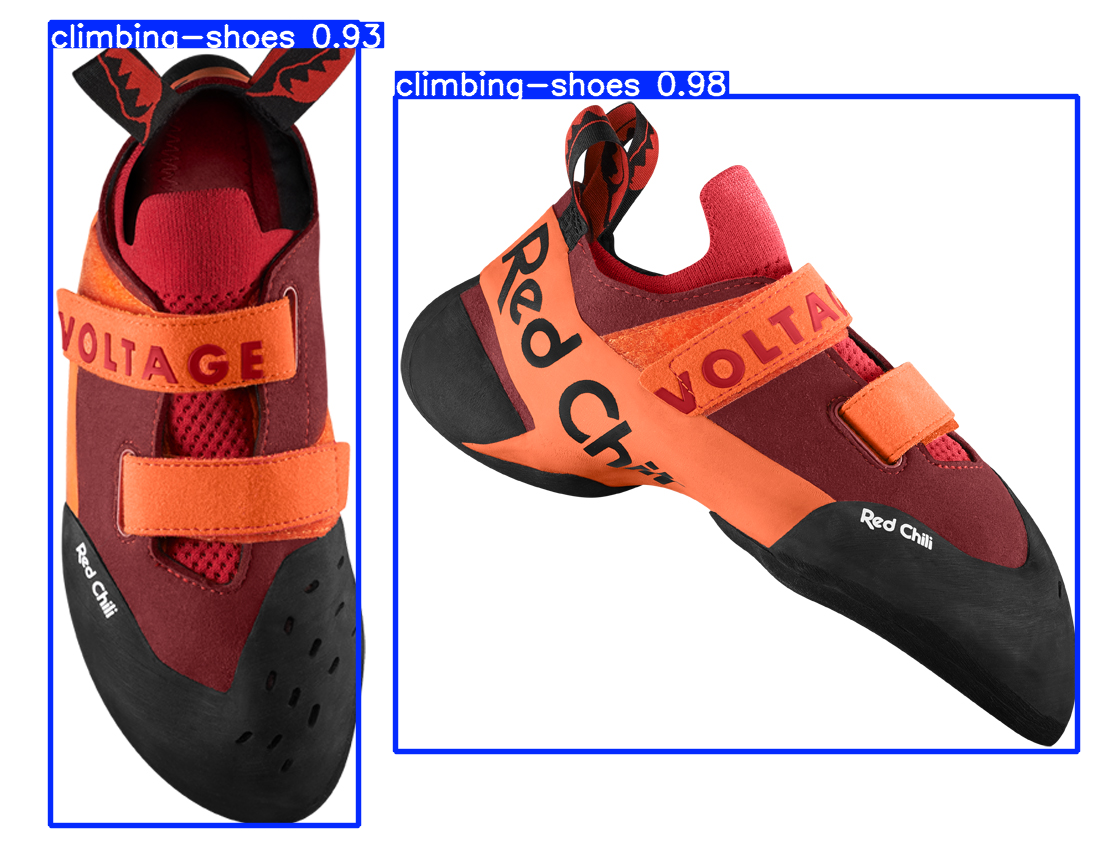

In [31]:
from PIL import Image
Image.fromarray(result.plot()[:, :, ::-1])
